In [91]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [92]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [93]:
df['sum_g']=df['G1'] +df['G2'] +df['G3']
df['sum_MF_edu'] = df['Medu'] +df['Fedu']
df['sum_alc'] = df['Dalc'] +df['Walc']

# Introduction to the Data Set and Purpose of Analysis

The data set contains data from a survey of 395 math students in a secondary. It contains information on their gender, social demographics, parents education, health, alcohol consumption, study habits and maths exam grades.  
The purpose of this study is trying to predict what could be done to improve student grades and which demography would be most effective to target.

The following correlation matrix show the correlation factors for each of the numerical data. Our specific parameter of interest within this data set is sum_g (the sum of all final grades for each student), and so studies will focus on the attributes that has a high correlation with this parameter. 

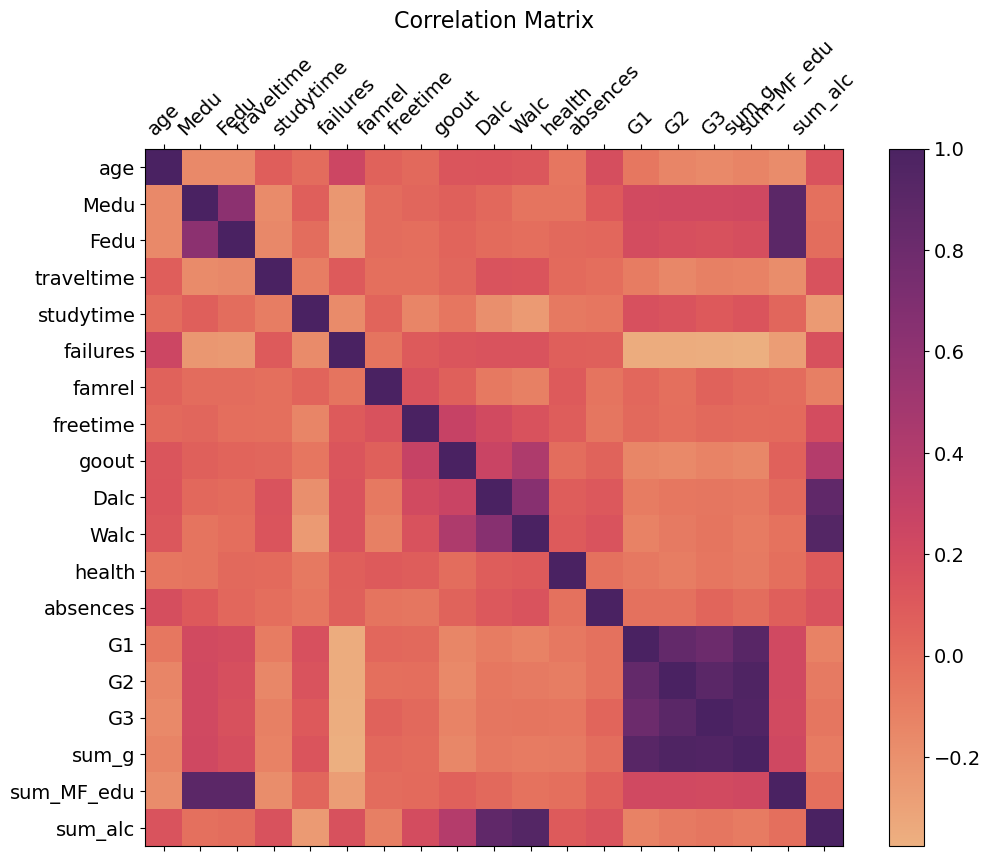

In [95]:
f = plt.figure(figsize=(12, 9))
plt.matshow(df.corr(numeric_only=True), fignum=f.number, cmap='flare')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Study 1: Study Time Influence on Grades

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 37.0)

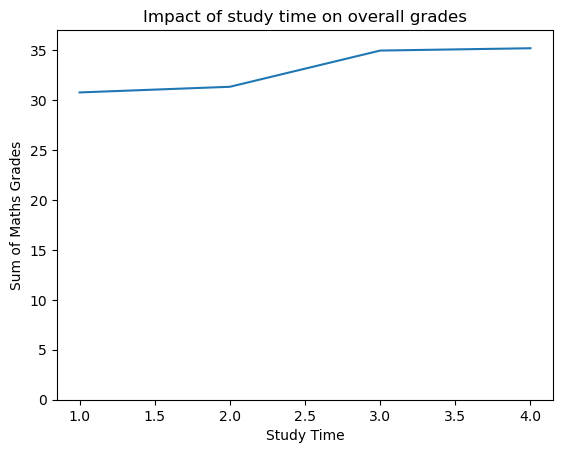

In [18]:
study_time_grd = sns.lineplot(data=df, x='studytime', y='sum_g', errorbar=None)
study_time_grd.set(title= 'Impact of study time on overall grades' , xlabel= 'Study Time', ylabel = 'Sum of Maths Grades')
# plt.ylim([0, 37])

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

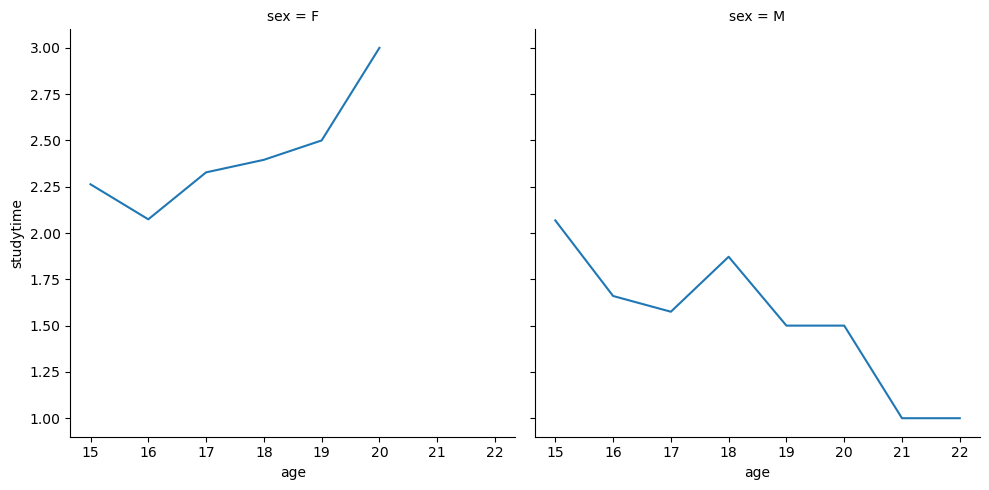

In [6]:
Age_Study_Time_Gender = sns.relplot(kind='line',data=df, x='age', y='studytime', col='sex', errorbar=None)

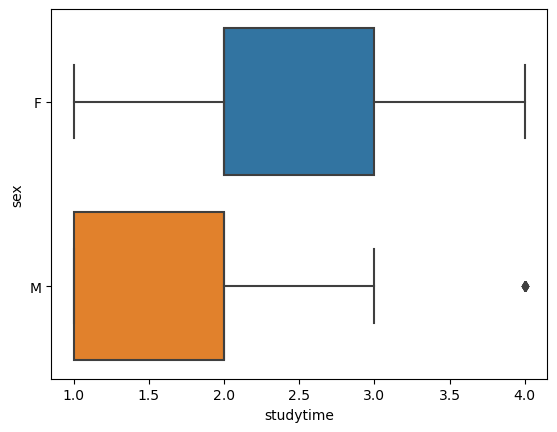

In [7]:
Gender_Study_Time= sns.boxplot(data=df, x='studytime', y='sex')

On average males study 1 hour less per day than females.
As females go through high school they study more. As males go through high school they study less.
What are the factors influencing males to study less as they get older? Are they finding other interests? Other priorities? Are they losing motivation? Let's compare some lifestyle factor changes between males and females as they progress through teenagehood.

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


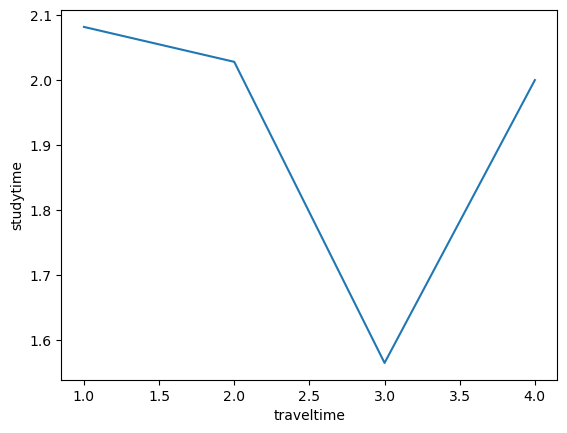

In [8]:
travel_study_time = sns.lineplot(data=df, y='studytime', x='traveltime',errorbar=None)

It appears that study time decreases with increased travel time, as expected up until 3 hours, where study time conversely increases. Let's check the realiabilty of the travel time = 3+ hours data. A potential explaination for this could be if you are travelling for a long time, it gives you a lot of time to study.

<Axes: xlabel='traveltime', ylabel='sex'>

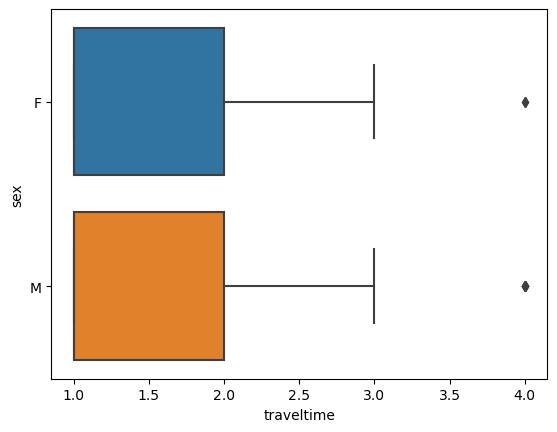

In [9]:
sns.boxplot(data=df, x='traveltime', y='sex')

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


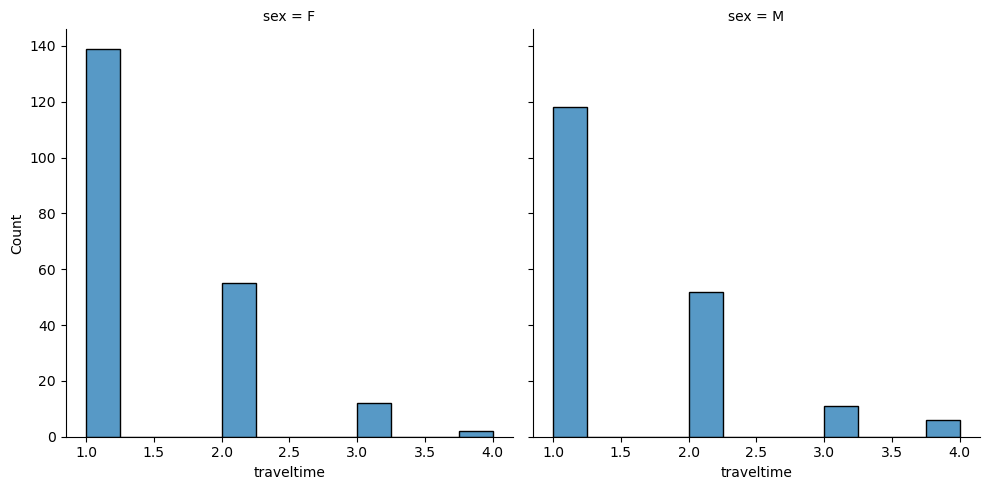

In [10]:
sns.displot(kind='hist', data=df, x='traveltime', col='sex')

For both male and females it appears that data for >3+ hours is considerd to be an outlier. Hence we will exclude this data from our model. The revised travel time vs study time graph is shown below.

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

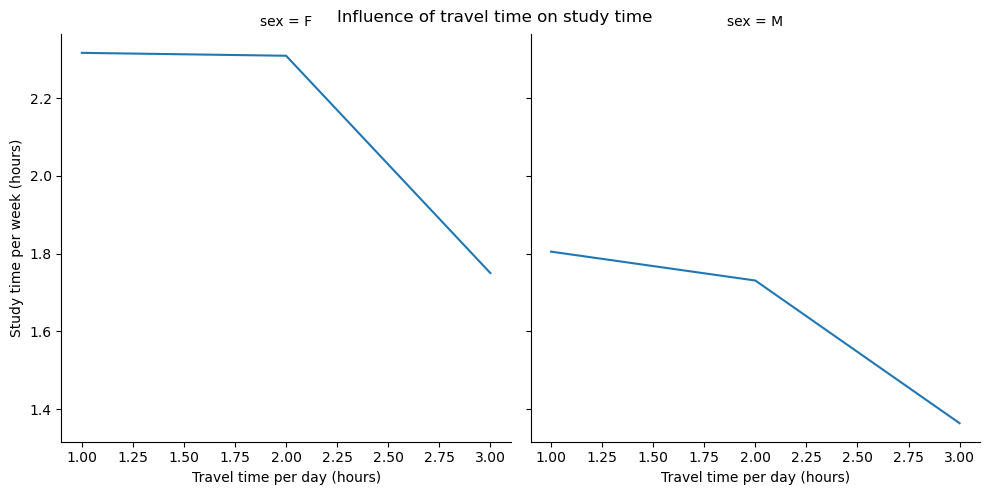

In [11]:
df_new = df[df['traveltime'] < 4]
travel_study_time_sex = sns.relplot(kind='line', data=df_new, y='studytime', x='traveltime', errorbar=None, col = 'sex')
plt.suptitle('Influence of travel time on study time')
travel_study_time_sex.set(xlabel='Travel time per day (hours)', ylabel= 'Study time per week (hours)')

Travel time has a signficant impact on study time for both male and female students. We can study the discrepency in study time between males and females without considering the influence of study time.

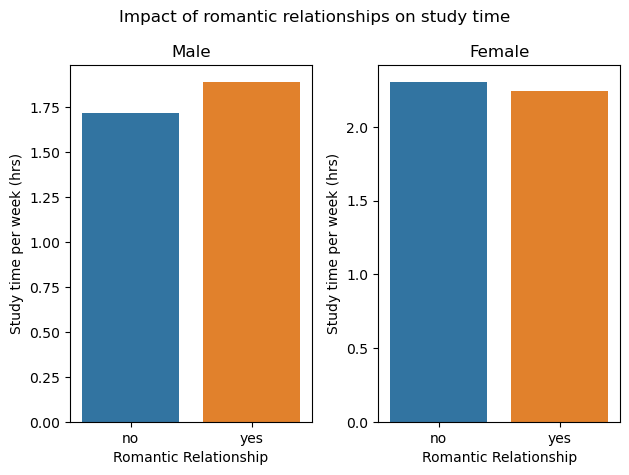

In [14]:
df_m = df[df['sex'] == 'M']
df_f =df[df['sex'] == 'F']
plt.subplot(1,2,1)
plt.suptitle('Impact of romantic relationships on study time')
sns.barplot(data=df_m, x='romantic', y='studytime', errorbar=None)
plt.title('Male')
plt.ylabel('Study time per week (hrs)')
plt.xlabel('Romantic Relationship')
plt.subplot(1,2,2)
plt.title('Female')
sns.barplot(data=df_f, x='romantic', y='studytime', errorbar=None)
plt.ylabel('Study time per week (hrs)')
plt.xlabel('Romantic Relationship')
plt.tight_layout()

Having a romantic relationships slightly increases study time for males, however not by a significant amount. Conversely for females having a romantic relationship slightly reduces study time. The difference is study time due to this factor is not considered to be signficant.

In [ ]:
df_new_m = df_new[df_new['sex'] == 'M']
df_new_f =df_new[df_new['sex'] == 'F']
plt.subplot(1,2,1)
plt.suptitle('Impact of extra cirricular activities on study time')
sns.barplot(data=df_new_m, x='activities', y='studytime', errorbar=None)
plt.title('Male')
plt.ylabel('Study time per week (hrs)')
plt.xlabel('EC activities')
plt.subplot(1,2,2)
plt.title('Female')
sns.barplot(data=df_new_m, x='activities', y='studytime', errorbar=None)
plt.ylabel('Study time per week (hrs)')
plt.xlabel('EC activities')
plt.tight_layout()


Participating in Extra Cirricular slightly increases study time, however not by a significant amount. It appears that there is not enough data to be able to reveal the determining factor in what causes males to study less hours than females. This study will temporarily suspended and explored further once more relevant data is collected.

The summary from study 1 is that reducing student's travel time is a good way to increase study time and hence increase grades.

# Study 2: Mother/Fathers Job Influence on Grades

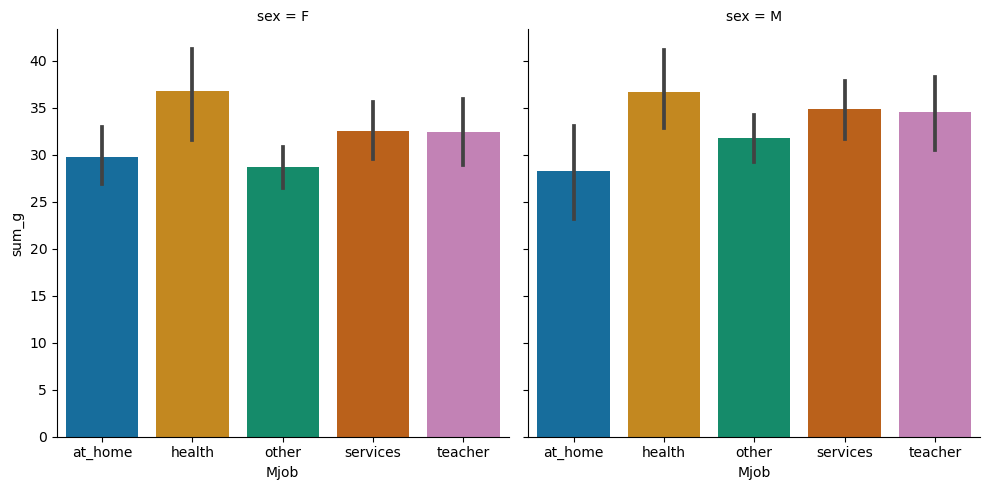

In [33]:
mother_job_grd= sns.catplot(kind='bar', data=df, x='Mjob', y='sum_g', col='sex', palette='colorblind')

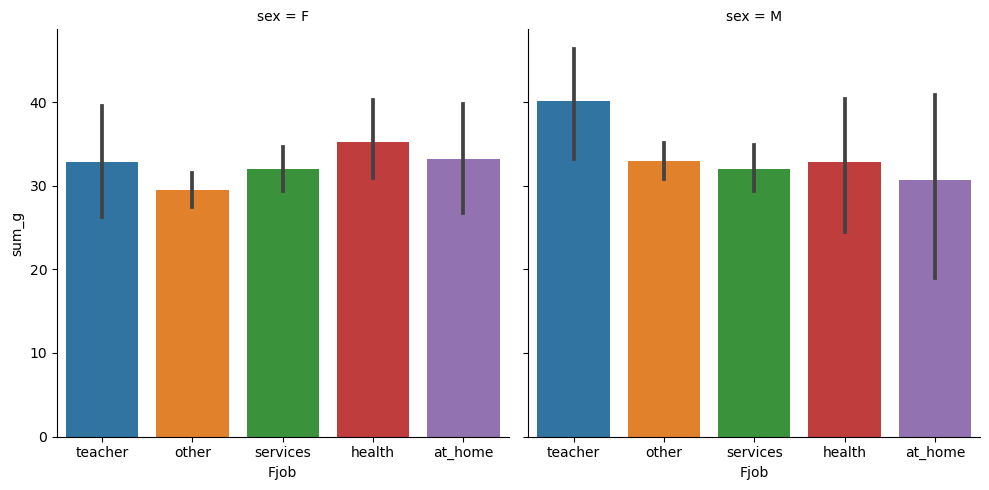

In [25]:
father_job_grd= sns.catplot(kind='bar', data=df, x='Fjob', y='sum_g', col='sex')

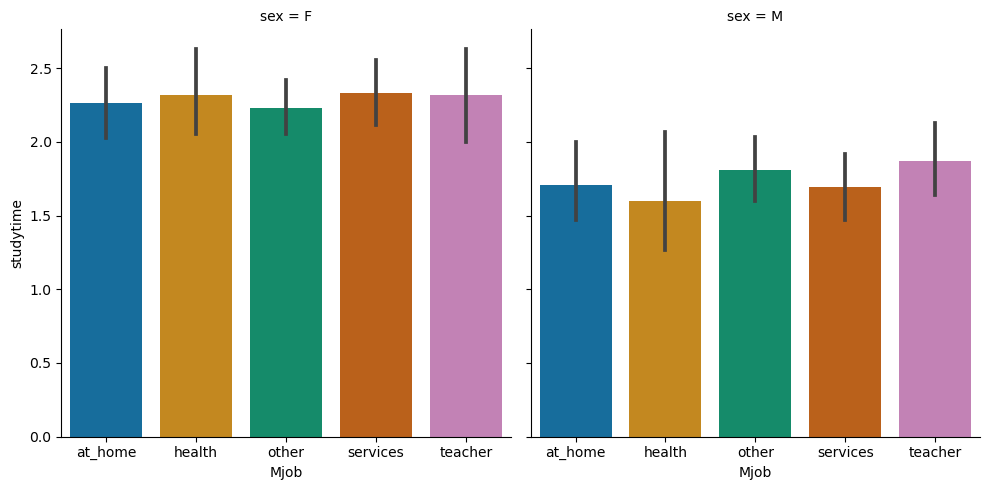

In [34]:
mother_job_st= sns.catplot(kind='bar', data=df, x='Mjob', y='studytime', col='sex', palette='colorblind')

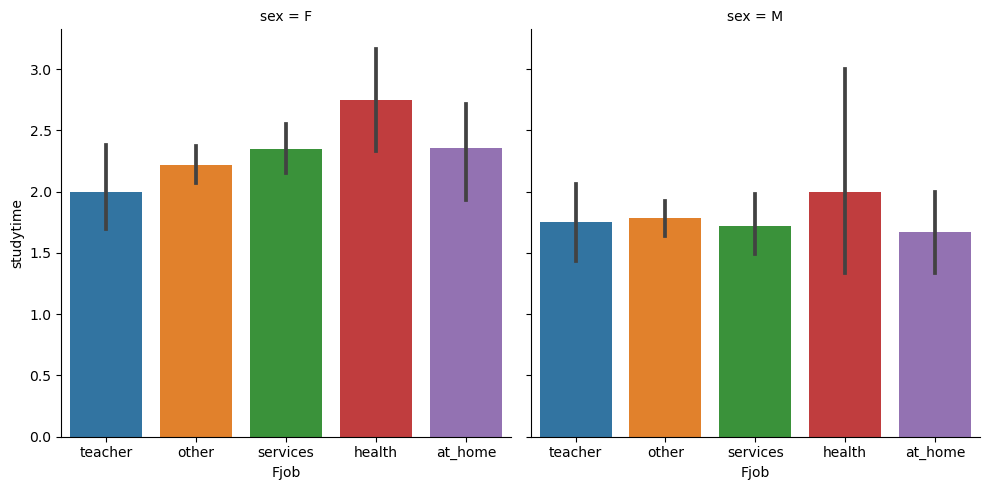

In [27]:
father_job_grd= sns.catplot(kind='bar', data=df, x='Fjob', y='studytime', col='sex')

Mother and Father's Job do not seem to exert any influence over the student's Math grades for both female and male students. Note this could be due to the lack of data, or specific job descriptions.

# Study 3: Mother/Fathers Education Influence on Grades

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


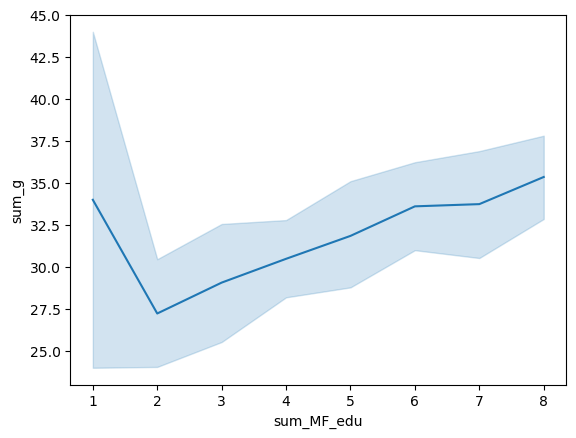

In [45]:
MF_edu_grd = sns.lineplot(data=df, x='sum_MF_edu', y='sum_g')

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


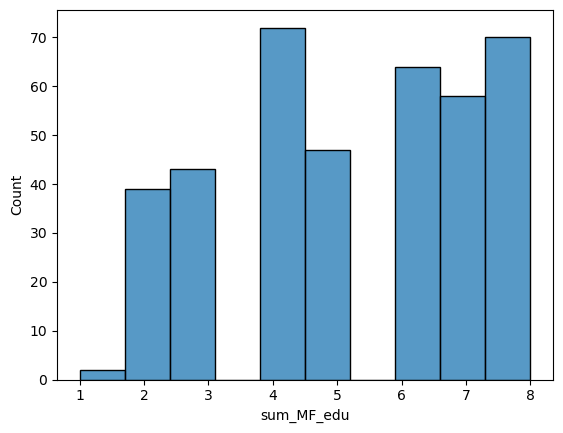

In [42]:
sns.histplot(data=df,x='sum_MF_edu')
df_edu_new = df[df['sum_MF_edu']>1]

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, "Combined Mother and Father's Education vs Math Grades"),
 Text(0.5, 0, "Combined Mother and Father's Education Level (Scale 1-8)"),
 Text(0, 0.5, 'Sum of Math Grades')]

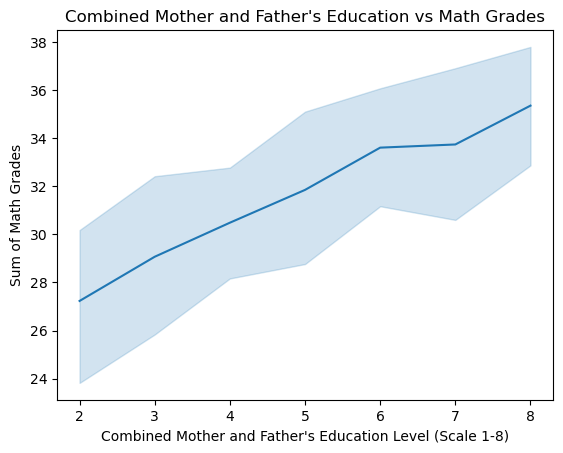

In [46]:
MF_edu_grd = sns.lineplot(data=df_edu_new, x='sum_MF_edu', y='sum_g')
MF_edu_grd.set(title= 'Combined Mother and Father\'s Education vs Math Grades', xlabel='Combined Mother and Father\'s Education Level (Scale 1-8)', ylabel='Sum of Math Grades')

Explore whether Mother's education level or Father's level education level has a larger impact on grades.

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, "Mother's Education vs Math Grades"),
 Text(0.5, 0, "Mother's Education Level (Scale 1-4)"),
 Text(0, 0.5, 'Sum of Math Grades')]

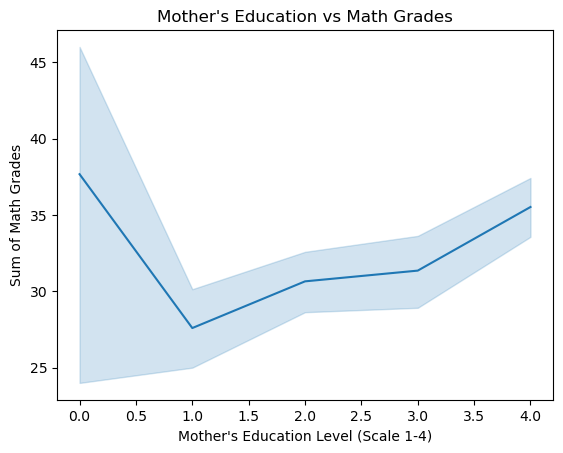

In [49]:
M_edu_grd = sns.lineplot(data=df, x='Medu', y='sum_g')
M_edu_grd.set(title= 'Mother\'s Education vs Math Grades', xlabel='Mother\'s Education Level (Scale 1-4)', ylabel='Sum of Math Grades')

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


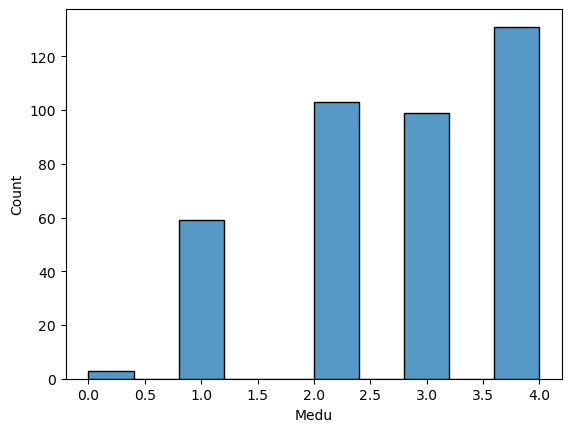

In [54]:
sns.histplot(data=df, x='Medu')
df_Medu_new = df[df['Medu']>0.5]

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, "Mother's Education vs Math Grades"),
 Text(0.5, 0, "Mother's Education Level (Scale 1-4)"),
 Text(0, 0.5, 'Sum of Math Grades')]

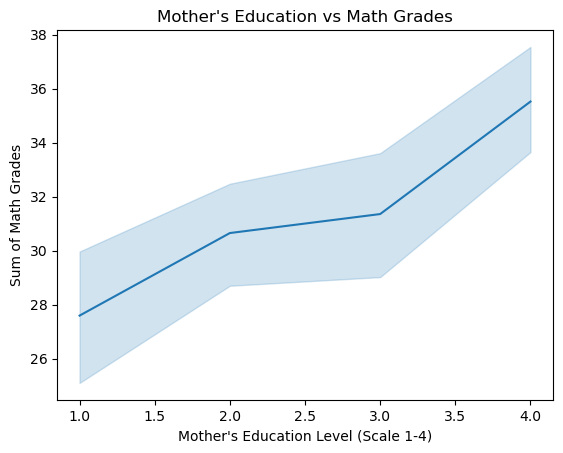

In [55]:
M_edu_grd = sns.lineplot(data=df_Medu_new, x='Medu', y='sum_g')
M_edu_grd.set(title= 'Mother\'s Education vs Math Grades', xlabel='Mother\'s Education Level (Scale 1-4)', ylabel='Sum of Math Grades')

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, "Father's Education vs Math Grades"),
 Text(0.5, 0, "Father's Education Level (Scale 1-4)"),
 Text(0, 0.5, 'Sum of Math Grades')]

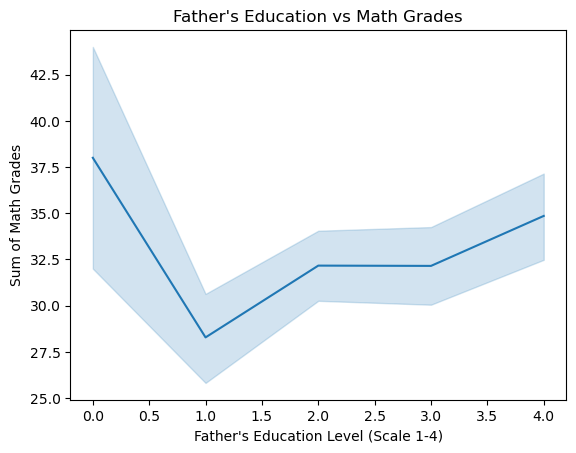

In [50]:
F_edu_grd = sns.lineplot(data=df, x='Fedu', y='sum_g')
F_edu_grd.set(title= 'Father\'s Education vs Math Grades', xlabel='Father\'s Education Level (Scale 1-4)', ylabel='Sum of Math Grades')

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


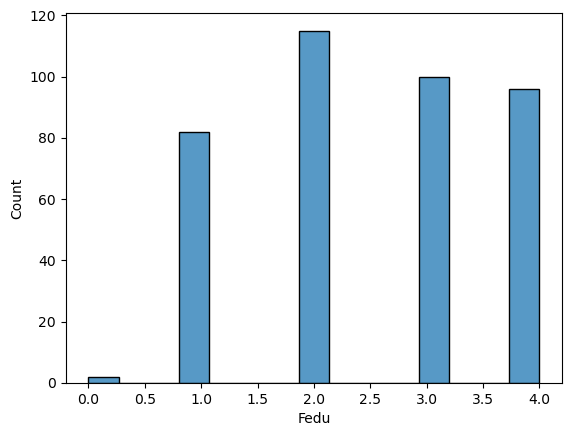

In [60]:
sns.histplot(data=df,x='Fedu')
df_Fedu_new = df[df['Fedu']>0.5]

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, "Father's Education vs Math Grades"),
 Text(0.5, 0, "Father's Education Level (Scale 1-4)"),
 Text(0, 0.5, 'Sum of Math Grades')]

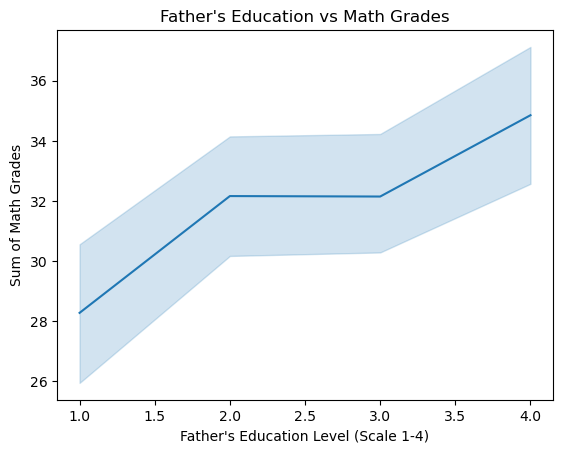

In [62]:
F_edu_grd = sns.lineplot(data=df_Fedu_new, x='Fedu', y='sum_g')
F_edu_grd.set(title= 'Father\'s Education vs Math Grades', xlabel='Father\'s Education Level (Scale 1-4)', ylabel='Sum of Math Grades')

Both mother and father's education level exert a similarly large influence on the grades of the student.


# Study 4: Alcohol Consumption Influence on Grades

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Total Alcohol Consumption (daily and weekly) vs Total Math Grade'),
 Text(0.5, 0, 'Weekly Alcohol Consumption (Scale 0-10)'),
 Text(0, 0.5, 'Sum of Math Grades')]

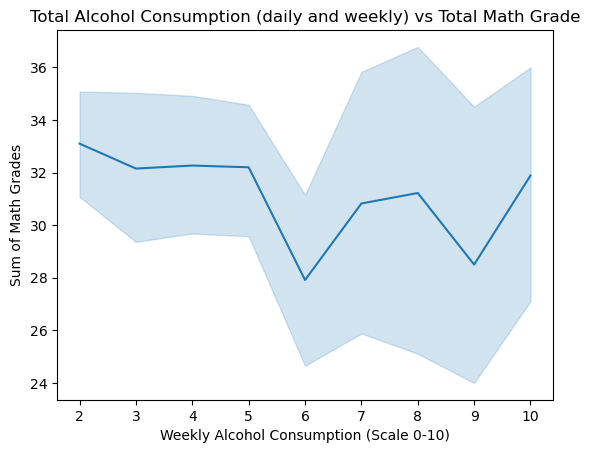

In [69]:
alc_grd = sns.lineplot(data=df, x='sum_alc', y='sum_g')
alc_grd.set(title='Total Alcohol Consumption (Weekday and Weekends) vs Total Math Grade', xlabel= 'Weekly Alcohol Consumption (Scale 0-10)', ylabel = 'Sum of Math Grades')

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Weekday Alcohol Consumption vs Total Math Grade'),
 Text(0.5, 0, 'Weekday Alcohol Consumption (Scale 0-5)'),
 Text(0, 0.5, 'Sum of Math Grades')]

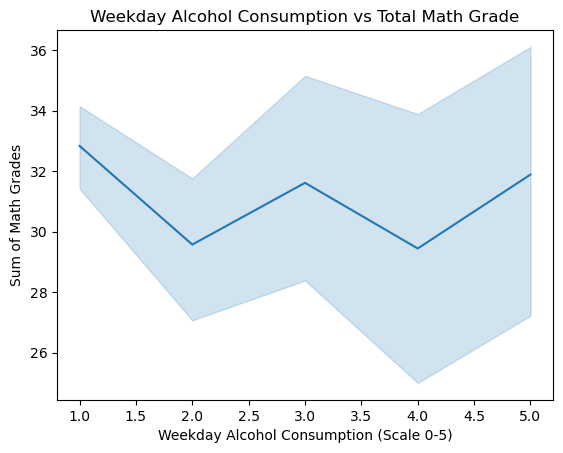

In [70]:
alc_grd = sns.lineplot(data=df, x='Dalc', y='sum_g')
alc_grd.set(title='Weekday Alcohol Consumption vs Total Math Grade', xlabel= 'Weekday Alcohol Consumption (Scale 0-5)', ylabel = 'Sum of Math Grades')

/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/zoe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Weekend Alcohol Consumption vs Total Math Grade'),
 Text(0.5, 0, 'Weekend Alcohol Consumption (Scale 0-5)'),
 Text(0, 0.5, 'Sum of Math Grades')]

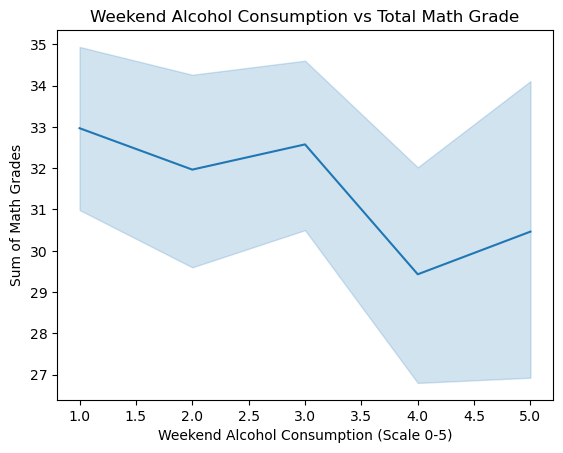

In [71]:
alc_grd = sns.lineplot(data=df, x='Walc', y='sum_g')
alc_grd.set(title='Weekend Alcohol Consumption vs Total Math Grade', xlabel= 'Weekend Alcohol Consumption (Scale 0-5)', ylabel = 'Sum of Math Grades')

The graphs show that there is no correlation between alcohol consumption (total and split into weekday and weekend consumptions) and sum of math grades.